In [1288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [1289]:
load = pd.read_csv("salary.csv")

In [1290]:
data_in = load.copy()

In [1291]:
data_in.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1292]:
data_in.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1293]:
data_in.select_dtypes('object').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [1294]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1295]:
# Encoder который не разбивает фрейм
class MyEncoder():
    def __init__(self, columns=None):
        self.columns = columns
    
    def __repr__(self):
        return f'MyEncoder метод LabelEncoder'
    
    def fit_transform(self, data):
        if not self.columns:
            for column in data.select_dtypes('object'):
                encoder = LabelEncoder()
                data[column] = encoder.fit_transform(data[column])        
        else:
            for column in self.columns:
                encoder = LabelEncoder()
                data[column] = encoder.fit_transform(data[column])
        print('Выполнено')
        return data

    
# Scaler который не разбивает фрейм   
class MyScaler():
    def __init__(self, columns=None):
        self.columns = columns
    
    def __repr__(self):
        return f'MyScaler метод MinMax scale'

    
    def fit_transform(self, data_in):
        data = data_in
        if not self.columns:
            for column in data:
                scaler = MinMaxScaler()
                data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
        else:
            for column in self.columns:
                scaler = MinMaxScaler()
                data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
        print('Выполнено')
        return data

    
# Split для подачи в пайп    
class MySplitter():
    def __repr__(self):
        return f'MySplitter метод train_test_split'
    
    def __init__(self, target):
        self.target = target
    
    def fit_transform(self, data):
        X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=self.target), 
                                                            data[self.target], 
                                                            random_state=42, 
                                                            test_size=0.3)
        print('Выполнено')
        return X_train, X_test, y_train, y_test


# Регрессия для подачи в пайп
class MyRegressor():       
    def __repr__(self):
        return f'MyRegressor метод LogisticRegression'
    
    def __init__(self, X_test=None, y_test=None):
        self.X_test = X_test
        self.y_test = y_test
        
    def fit_transform(self, data_splitted):
        if len(data_splitted) != 4:
            X_train, y_train = data_splitted
            X_test = self.X_test
            y_test = self.y_test
        else:
            X_train, X_test, y_train, y_test = data_splitted
            
        for new in X_train.columns[~X_train.columns.isin(X_test.columns)].values:
            X_test[new] = 0
        X_test = X_test.reindex(columns = X_train.columns)
            
        self.model = LogisticRegression(max_iter=10000)
        self.model.fit(X_train, y_train)
        predict_proba = self.model.predict_proba(X_test)[:,1]
        print('Выполнено')
        return predict_proba, y_test


# Оценщик для подачи в пайп    
class MyScores():
    def __init__(self, name):
        self.name = name
        
    def __repr__(self):
        return f'MyScores: Precision | Recall | F-score | ROC_AUC-score'
    
    def fit_transform(self, predictions):
        predict_proba, y_test = predictions
        
        report = classification_report(y_test, predict_proba.round().astype(int), output_dict=True)
        
        roc_auc = roc_auc_score(y_test, predict_proba)
        
        results = pd.DataFrame(columns = ['Precision', 'Recall', 'F-score', 'Accuracy','ROC_AUC', 
                                          'Precision Target', 'Recall Target', 'F-score Target'])
        
        accuracy = accuracy_score(y_test, predict_proba.round().astype(int))
        
        results.loc[self.name] = [report['macro avg']['precision'], 
                                 report['macro avg']['recall'], 
                                 report['macro avg']['f1-score'],
                                 accuracy,
                                 round(roc_auc, 2), 
                                 report['1.0']['precision'], 
                                 report['1.0']['recall'], 
                                 report['1.0']['f1-score']]
        print('Выполнено')
        return results
                            

# Кастомный пайп для смешанных классов
class MyPipe():
    def __init__(self, *args):
        self.steps = args
        
    def __repr__(self):
        return str(self.steps).replace(', ', '\n').strip('()')
        
    def fit_transform(self, data):
        for counter, step in enumerate(self.steps):
            print(f'Step {counter + 1}/{len(self.steps)}: {step}')
            
            data = step.fit_transform(data)
        return data


1. <h5>Получите базовое решение</h5>


In [1296]:
# Через пайп сделаем прямой LabelEncode, MinMax scale, обучим базовую модель, проведем оценку метрик

base_pipe = MyPipe(MyEncoder(),
                  MyScaler(),
                  MySplitter('salary'),
                  MyRegressor(),
                  MyScores('Base'))

In [1297]:
base_pipe

MyEncoder метод LabelEncoder
MyScaler метод MinMax scale
MySplitter метод train_test_split
MyRegressor метод LogisticRegression
MyScores: Precision | Recall | F-score | ROC_AUC-score

In [1298]:
base_result = base_pipe.fit_transform(data_in)

Step 1/5: MyEncoder метод LabelEncoder
Выполнено
Step 2/5: MyScaler метод MinMax scale
Выполнено
Step 3/5: MySplitter метод train_test_split
Выполнено
Step 4/5: MyRegressor метод LogisticRegression
Выполнено
Step 5/5: MyScores: Precision | Recall | F-score | ROC_AUC-score
Выполнено


In [1299]:
base_result

,Precision,Recall,F-score,Accuracy,ROC_AUC,Precision Target,Recall Target,F-score Target
Base,0.777405,0.692646,0.71796,0.824956,0.85,0.710014,0.441227,0.544243


2. <h5>Проведите первичный и визуальный анализ данных</h5>

In [1300]:
# Cначала заргрузим копию данных до обработки
data_work = load.copy()

In [1301]:
# Сразу разобьем данные на тест и валидацию используя готовый класс
split = MySplitter('salary')
X_train, X_test, y_train, y_test = split.fit_transform(data_work)

Выполнено


In [1302]:
# Для удобства обработки объедиим данные в 2 фрейма.
data_train = X_train.join(y_train)
data_test = X_test.join(y_test)

In [1303]:
# Изучим количественные признаки
data_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.568050,1.896914e+05,10.091216,1045.572613,89.470648,40.384565
std,13.645603,1.056332e+05,2.578429,7144.535491,406.839418,12.288751
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782330e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.373080e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


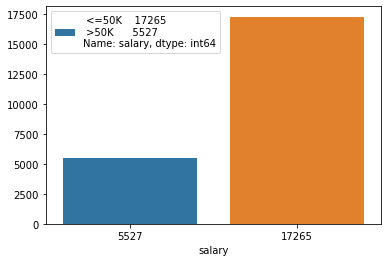

In [1304]:
# Баланс целевой характеристики
train_balance = data_train['salary'].value_counts()
sns.barplot(data = train_balance, x=train_balance.index, y=train_balance.values, label=train_balance)
plt.legend()
plt.show()

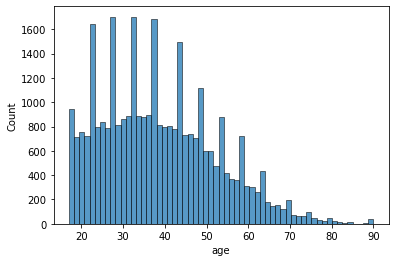

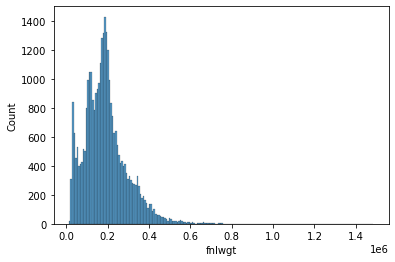

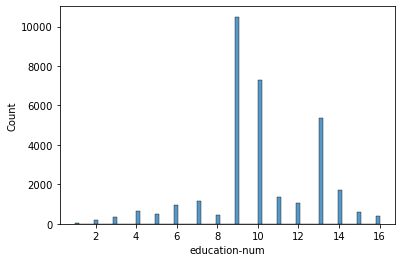

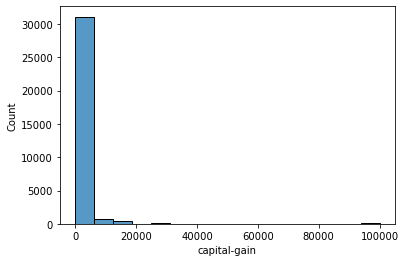

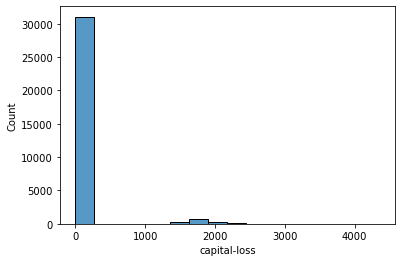

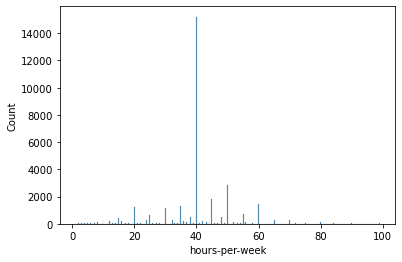

In [1305]:
for column in data_work.select_dtypes('int64'):
    sns.histplot(data = data_work, x=column)
    plt.show()

<h5>Наметим план обработки данных:</h5>
 - age и hours-per-week разобьем на 4 категории через pd.cut.
 
 Границы категорий подберем такие, чтобы группы оказались близкие по численности. Важно разбивку сделать по тренеровочной выборке, а тестовую преобразовать уже по получившимся бинам, иначе получится, что мы передадим часть информации о численности групп из тренеровочной части в обучающую. Дальше эти свойства можно преобразовать через Lebel encoder.
 
 - целевой признак не сбалансирован, применим oversamplig по признаку Salary
 

In [1306]:
class MyTargetChanger():
    def __init__(self, dct={}, target=None):
        self.dct = dct
        self.target = target

        
    def __repr__(self):
        return f'MyTargetChanger: Прямая замена таргета'

    
    def fit_transform(self, data):
        if self.dct:
            data[self.target] = data[self.target].map(self.dct)
        else:
            for counter, el in enumerate(data[self.target].unique()):
                self.dct[el] = counter
            data[self.target] = data[self.target].map(self.dct)
        return data     
        

# Сделаем свой класс для разделения выборки на равные части/на поданные части
class MyCutter():
    def __init__(self, columns=None, bins=None):
        self.columns = columns
        self.bins = bins
        
    def __repr__(self):
        return f'MyCutter: метод cut/qcut'
        
    def fit_transform(self, data :pd.DataFrame):
        dct_bins = {}
        if self.columns:
            if self.bins:
                dct_bins = self.bins
                for column in self.columns:
                    data[column] = pd.cut(data[column], bins=dct_bins[column])
            else:
                for column in self.columns:
                    res = pd.qcut(data[column], 4, retbins=True, duplicates='drop')
                    data[column] = res[0].values
                    dct_bins[column] = res[1]
        self.dct_bins = dct_bins
        return data

    
# Класс для логарифмирования
class MyLog():
    def __init__(self, columns = None):
        self.columns = columns
        
    def __repr__(self):
        return f'MyLog: метод np.log'
    
    def fit_transform(self, data):
        if self.columns:
            for column in self.columns:
                data[column] = np.log(data[column].where(data[column] > 0, 0.0001))
        else:
            for column in data.select_dtype('int64'):
                data[column] = np.log(data[column].where(data[column] > 0, 0.0001))
        return data

    
# OneHotEncoder который умеет в пайплайн
class MyHotencoder():
    def __init__(self, columns=None):
        self.columns = columns
        
    def __repr__(self):
        return f'MyHotenc: метод GetDummies'
    
    def fit_transform(self, data):
        if not self.columns:
            columns = data.select_dtypes('object').columns.to_list()
            data = pd.get_dummies(data, columns=columns)
        else:
            columns = self.columns
            data = pd.get_dummies(data, columns=columns)
        print('Выполнено')
        return data
    
class MyOversampler():
    def __init__(self, target):
        self.target = target
        
    def __repr__(self):
        return f'MyOversampler: метод SMOTE oversample'
    
    def fit_transform(self, data):
        coef = data[self.target].value_counts().min() / sum(data[self.target].value_counts())
        sampler = SMOTE(sampling_strategy=coef*2)
        X, y = sampler.fit_resample(data.drop(columns=self.target), data[self.target])
        data = X.join(y)
        return data

3. <h5>Сделайте предобработку данных</h5>

<h5>Отедльно обработаем данные для трейн и тест выборок</h5>

In [1307]:
train_cut = MyCutter(['age', 'hours-per-week']) # Создадим вне пайпа, чтобы потом забрать словарь разбиения в тестовый пайплайн 
train_changer = MyTargetChanger(target='salary')
train_pipe = MyPipe(train_changer,
                    train_cut, # 1 шаг: Разобьем age и hours-per-week на группы
                    MyEncoder(['age', 'hours-per-week']), # 2 шаг: Перекодируем целевой признак
                    MyHotencoder(), # 3 шаг: Закодируем все качественные данные в новые признаки с значением 0/1
                    MyScaler(), # 4 шаг: Масштабируем данные
                    MyOversampler('salary') # 5 шаг: Оверсэмплинг по целевому
                   )

In [1308]:
# Смотрим что зарядили в пайп
train_pipe

MyTargetChanger: Прямая замена таргета
MyCutter: метод cut/qcut
MyEncoder метод LabelEncoder
MyHotenc: метод GetDummies
MyScaler метод MinMax scale
MyOversampler: метод SMOTE oversample

In [1309]:
data_train = train_pipe.fit_transform(data_train)

Step 1/6: MyTargetChanger: Прямая замена таргета
Step 2/6: MyCutter: метод cut/qcut
Step 3/6: MyEncoder метод LabelEncoder
Выполнено
Step 4/6: MyHotenc: метод GetDummies
Выполнено
Step 5/6: MyScaler метод MinMax scale
Выполнено
Step 6/6: MyOversampler: метод SMOTE oversample


In [1310]:
data_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary
0,0.333333,0.030002,0.533333,0.000000,0.50023,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.666667,0.157120,0.600000,0.076881,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.029962,0.600000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,0.165117,0.533333,0.000000,0.00000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.193532,0.400000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1311]:
# Заберем интервалы для разделения тестовой выборки
train_bins = train_cut.dct_bins
train_bins

{'age': array([17., 28., 37., 48., 90.]),
 'hours-per-week': array([ 1., 40., 45., 99.])}

In [1312]:
# Теперь можно зарядить тот же пайп для тестовых данных, но подать в MyCutter интервалы

test_pipe = MyPipe(train_changer,
                    MyCutter(['age', 'hours-per-week'], train_bins), # 1 шаг: Разобьем age и hours-per-week на группы
                    MyEncoder(['salary', 'age', 'hours-per-week']), # 2 шаг: Перекодируем целевой признак
                    MyHotencoder(), # 3 шаг: Закодируем все качественные данные в новые признаки с значением 0/1
                    MyScaler() # 4 шаг: Масштабируем данные
                   )

In [1313]:
test_pipe

MyTargetChanger: Прямая замена таргета
MyCutter: метод cut/qcut
MyEncoder метод LabelEncoder
MyHotenc: метод GetDummies
MyScaler метод MinMax scale

In [1314]:
data_test = test_pipe.fit_transform(data_test)

Step 1/5: MyTargetChanger: Прямая замена таргета
Step 2/5: MyCutter: метод cut/qcut
Step 3/5: MyEncoder метод LabelEncoder
Выполнено
Step 4/5: MyHotenc: метод GetDummies
Выполнено
Step 5/5: MyScaler метод MinMax scale
Выполнено


In [1315]:
data_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
14160,0.00,0.115919,0.600000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27048,0.50,0.028472,0.533333,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28868,0.25,0.136446,0.800000,0.00000,0.0,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5667,0.25,0.139743,0.800000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7827,0.25,0.139189,0.600000,0.02202,0.0,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


4. <h5>Обучите модель классификации с целевым признаком salary</h5>

In [1316]:
X_train = data_train.drop(columns='salary')
y_train = data_train['salary']
X_test = data_test.drop(columns='salary')
y_test = data_test['salary']

In [1317]:
final_model = MyRegressor(X_test=X_test, y_test=y_test)
score_pipe = MyPipe(final_model,
                   MyScores('После обработки'))

In [1318]:
score_pipe

MyRegressor метод LogisticRegression
MyScores: Precision | Recall | F-score | ROC_AUC-score

In [1319]:
score = score_pipe.fit_transform((X_train, y_train))

Step 1/2: MyRegressor метод LogisticRegression
Выполнено
Step 2/2: MyScores: Precision | Recall | F-score | ROC_AUC-score
Выполнено


In [1320]:
score

,Precision,Recall,F-score,Accuracy,ROC_AUC,Precision Target,Recall Target,F-score Target
После обработки,0.800059,0.777986,0.787941,0.852185,0.9,0.709336,0.636992,0.67122


In [1321]:
results = pd.concat((base_result, score))

In [1322]:
results

,Precision,Recall,F-score,Accuracy,ROC_AUC,Precision Target,Recall Target,F-score Target
Base,0.777405,0.692646,0.717960,0.824956,0.85,0.710014,0.441227,0.544243
После обработки,0.800059,0.777986,0.787941,0.852185,0.90,0.709336,0.636992,0.671220


In [1323]:
# Количество признаков для обучения
coef = final_model.model.coef_.tolist()[0]
len(coef)

108

- Удалось улучшить метрики качества модели
- Финальная модель обучена на 108 признаках

5. <h5>Проведите отбор признаков минимум с помощью трех подходов</h5>

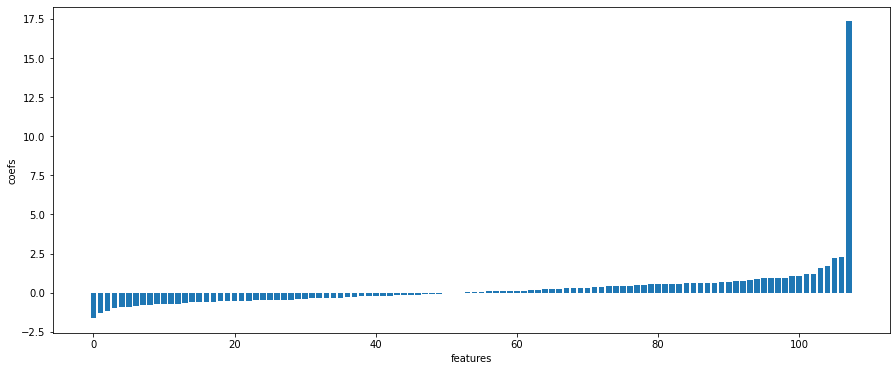

In [1351]:
# Смотрим на вклад признаков
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(coef)), sorted(coef))
plt.xlabel('features')
plt.ylabel('coefs');

In [1333]:
coef = np.array(coef)
features = X_train.columns

In [1332]:
# Коэффициенты с модулем менее 0.15
coef[abs(coef) < 0.15]

array([-0.12766457,  0.10172641, -0.0629649 , -0.04926623,  0.0327273 ,
        0.12934438, -0.08158808,  0.06985638,  0.13879411,  0.08427517,
        0.12346477, -0.00912006, -0.10779852, -0.01357355, -0.13411563,
        0.04152612,  0.12110496,  0.13296253])

In [1352]:
# Создаем маску для полезных фичей
mask = abs(coef) > 0.15
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True])

In [1340]:
# Остались коэффициенты
step_1 = features[mask]
len(step_1)

90

In [1342]:
X_train_step1 = X_train.reindex(columns=step_1)

In [1344]:
X_test_step1 = X_test.reindex(columns=step_1)

In [1346]:
step1_model = MyRegressor(X_test=X_test_step1, y_test=y_test)
step1_score = MyPipe(step1_model,
                   MyScores('Step 1'))

In [1347]:
step1 = step1_score.fit_transform((X_train_step1, y_train))

Step 1/2: MyRegressor метод LogisticRegression
Выполнено
Step 2/2: MyScores: Precision | Recall | F-score | ROC_AUC-score
Выполнено


In [1350]:
results = pd.concat((results, step1))
results

,Precision,Recall,F-score,Accuracy,ROC_AUC,Precision Target,Recall Target,F-score Target
Base,0.777405,0.692646,0.717960,0.824956,0.85,0.710014,0.441227,0.544243
После обработки,0.800059,0.777986,0.787941,0.852185,0.90,0.709336,0.636992,0.671220
Step 1,0.799625,0.777487,0.787466,0.851878,0.90,0.708714,0.636128,0.670462


- на шаге 1 уменьшили количество признаков с 108 до 90 без существенной потери качества модели

In [1376]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(step1_model.model, max_features=70, threshold=-np.inf)
X_train_step2 = selector.fit_transform(X_train_step1, y_train)
X_train_step2 = X_train_step1.reindex(columns=X_train_step1.columns[selector.get_support()])
X_test_step2 = X_test_step1.reindex(columns=X_train_step2.columns)
X_train_step2.shape

(25638, 70)

In [1377]:
step2_model = MyRegressor(X_test=X_test_step2, y_test=y_test)
step2_score = MyPipe(step2_model,
                   MyScores('Step 2'))

In [1378]:
step2 = step2_score.fit_transform((X_train_step2, y_train))

Step 1/2: MyRegressor метод LogisticRegression
Выполнено
Step 2/2: MyScores: Precision | Recall | F-score | ROC_AUC-score
Выполнено


In [1389]:
results = pd.concat((results, step2))
results

,Precision,Recall,F-score,Accuracy,ROC_AUC,Precision Target,Recall Target,F-score Target
Base,0.777405,0.692646,0.717960,0.824956,0.85,0.710014,0.441227,0.544243
После обработки,0.800059,0.777986,0.787941,0.852185,0.90,0.709336,0.636992,0.671220
Step 1,0.799625,0.777487,0.787466,0.851878,0.90,0.708714,0.636128,0.670462
Step 2,0.799637,0.780505,0.789254,0.852390,0.90,0.706831,0.643907,0.673903


- на шаге 2 уменьшили количество признаков с 90 до 70 улучшили качество модели

In [1380]:
%%time
from sklearn.feature_selection import SequentialFeatureSelector

selector_final = SequentialFeatureSelector(
    step2_model.model, n_features_to_select=40, direction="forward"
)
selector_final.fit(X_train_step2, y_train)
X_train_step3 = X_train_step2.reindex(columns=X_train_step2.columns[selector_final.get_support()])
X_test_step3 = X_test_step2.reindex(columns=X_train_step3.columns)
X_train_step3.shape

CPU times: total: 1h 3min 57s
Wall time: 32min 22s


(25638, 40)

In [1390]:
step3_model = MyRegressor(X_test=X_test_step3, y_test=y_test)
step3_score = MyPipe(step3_model,
                   MyScores('Step 3'))

6. <h5>Оцените подходящие метрики качества</h5>

In [1391]:
step3 = step3_score.fit_transform((X_train_step3, y_train))
results = pd.concat((results, step3))
results

Step 1/2: MyRegressor метод LogisticRegression
Выполнено
Step 2/2: MyScores: Precision | Recall | F-score | ROC_AUC-score
Выполнено


,Precision,Recall,F-score,Accuracy,ROC_AUC,Precision Target,Recall Target,F-score Target
Base,0.777405,0.692646,0.717960,0.824956,0.85,0.710014,0.441227,0.544243
После обработки,0.800059,0.777986,0.787941,0.852185,0.90,0.709336,0.636992,0.671220
Step 1,0.799625,0.777487,0.787466,0.851878,0.90,0.708714,0.636128,0.670462
Step 2,0.799637,0.780505,0.789254,0.852390,0.90,0.706831,0.643907,0.673903
Step 3,0.798547,0.767302,0.780762,0.849524,0.90,0.712702,0.611063,0.657980


7. <h5>Сформулируйте выводы по проделанной работе</h5>

<img src='818343149_4347189.jpg' width=420, heigth=420>

- Обучил базовую модель
- Провел EDA, сделал предобработку данных при помощи кастомных классов и пайплайнов
- Провел LebelEncoding, OneHotEncoding, Масштабирование, Бининг, SMOTE оверсемплинг (также логарифмировал количественные признаки, но скор был меньше)
- В 3различных метода провел выбор признаков.
- SequentialFeatureSelector сделал больно моему ноутбуку
- Собрал метрики качества модели на каждом шаге, увеличил показатели относительно базовой модели.
- Не смотря на то, что последний шаг показал небольшое снижение метрик, удалось сократить количество фичей с 108 до 40 штук.